###### Importing Depencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

###### Loading the dataset

In [2]:
df = pd.read_csv('online_retail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [22]:
df['Country'].nunique()

37

###### Exploration

In [4]:
#shape
df.shape

(541909, 8)

In [5]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#Checking for duplicated values
duplicated_df = df.duplicated().sum()
duplicated_df

5268

In [12]:
#dropping duplicated values
df = df.drop_duplicates()

In [13]:
#Checking for missing values
missing_df = df.isnull().sum()
missing_df

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [14]:
#Dropping rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [15]:
#Dropping rows with missing Description 
df = df.dropna(subset=['Description'])

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df.shape

(401604, 8)

###### Checking for cancellations and clean data

In [18]:
#Transactions with 'C' are cancellations
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

#Removing negative or zero quantities
df = df[df['Quantity'] > 0]

#Removing negative prices
df = df[df['UnitPrice'] > 0]

df.shape


(392692, 8)

###### Top products by quantity

<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='Description'>

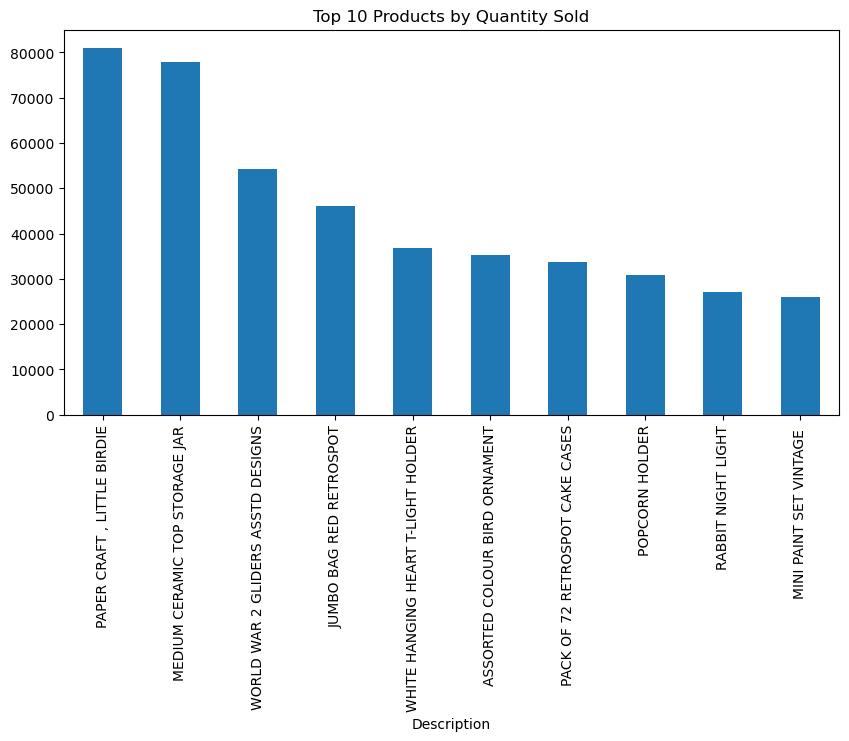

In [19]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold', figsize=(10,5))


######  Number of transactions per a country

Country
United Kingdom    16646
Germany             457
France              389
EIRE                260
Belgium              98
Name: InvoiceNo, dtype: int64


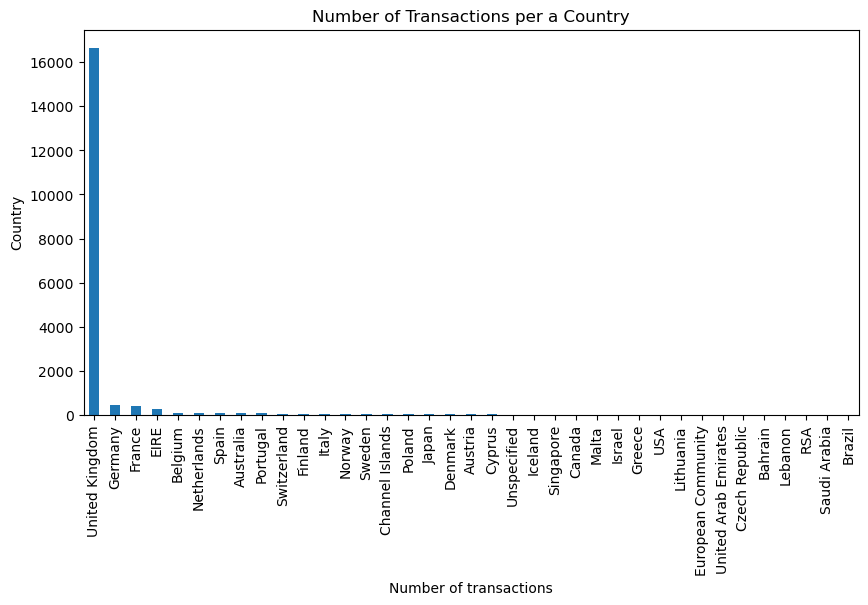

In [29]:
country_transactions = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
print(country_transactions.head())
country_transactions.plot(kind = 'bar', figsize=(10,5))
plt.title('Number of Transactions per a Country')
plt.ylabel("Country")
plt.xlabel("Number of transactions")
plt.show()

###### What is the distribution of order quantities?

In [26]:
quantity_stats = df['Quantity'].describe()
print(quantity_stats)


count    392692.000000
mean         13.119702
std         180.492832
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


###### What is the total revenue generated per month?

In [27]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('MonthYear')['Revenue'].sum()
print(monthly_revenue)


MonthYear
2010-12     570422.730
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517190.440
Freq: M, Name: Revenue, dtype: float64


###### Are there any products frequently returned or canceled?


In [28]:
returns = df[df['Quantity'] < 0].groupby('Description')['Quantity'].sum().sort_values()
print(returns.head(10))


Series([], Name: Quantity, dtype: int64)
